# Simulation 12: Heuristics vs. Baselines

TJ Kim
8/7/20

Updated: 4/20/21 -- For crawdad mobility instead of one mobility

Run the second simulation with the following considerations.

- 10 Servers, 20 TS, 15 Users --> increase servers to 20 and users to 40
- Use ONE-mobility --> crawdad
- Job lengths: vr = 10-15, Assist = 5-10, AR = 10-15
- We share the same users and jobs between simulations

Resources: Normal
- All jobs are run with standard Quantity
- 14 level 1, 5 level 2, 1 level 3

In [1]:
from IPython.core.debugger import set_trace

# Import Generic Classes
import numpy as np
import copy
import pickle
import random

# Import All Custom Classes
import os, sys
sys.path.append(os.path.pardir+"/classes")
sys.path.append(os.path.pardir+"/solvers")
sys.path.append(os.path.pardir+"/one_mobility")
sys.path.append(os.path.curdir + "/sim_store/sim12")
sys.path.append(os.path.pardir+"/crawdad_mobility")


from Server import *
from User import *
from Link import *
from Job import *
from Migration_Plans import *
from Cost_Recordings import *

from load_crawdad_usr import *

from sim12_setting import *
from sim12_setting_ample import *


# Import Solver Classes
from Optim_PlanGenerator import *
from SeqGreedy_PlanGenerator import *
from Myopic_PlanGenerator import *
from Naive_PlanGenerator import *
from Cloud_PlanGenerator import *

In [2]:
# Load Crawdad data
# Load All 12 users and trim their info
db_names = []
for i in range(1,13):
    db_names += ['LifeMap_GS'+str(i)+'.db']

db = []
for name in db_names:
    name = '/home/tkim/CMU/MEC_research/crawdad_mobility/' + name
    df,trace = load_usr(name)
    db += [trace]

In [3]:
num_trials = 10
Batch_cost_stores = []
SG_cost_stores = []
Naive_cost_stores = []
Myopic_cost_stores = []
Cloud_cost_stores = []

Batch_cost_stores_ample = []
SG_cost_stores_ample = []
Naive_cost_stores_ample = []
Myopic_cost_stores_ample = []
Cloud_cost_stores_ample = []

for i in range(num_trials):
    
    print("Trial Number:",i)
    
    print("limited")
        
    while True:
        try:
            # Make Users
            users, servers, links, jobs, sim_param = simulation_setting(db)
            # Make Batch Prob 
            print("batch_prob...")
            Batch_prob = SeqGreedy_PlanGenerator(users, servers, links, jobs, sim_param)
            Batch_plan = Migration_Plans(users,jobs,sim_param)
            Batch_plan.from_seq_greedy(Batch_prob)
            Batch_cost_stores += [Cost_Recordings(Batch_plan)]
            print("done!")
            
            
            break
        except:
            print("batch_broken, repeating with new users")
            continue
        
    
    
    # users, servers, links, jobs, sim_param = simulation_setting(db)
    
    # Make SG Prob
    # Set Refresh to false for SG
    refresh_rate = [0,0]
    refresh = False

    jobs2 = copy.deepcopy(jobs)
    for j in range(len(jobs2)):
        jobs2[j].info_from_usr(users[j],refresh_rate,refresh)
    
    print("SG prob...")
    SG_prob = SeqGreedy_PlanGenerator(users, servers, links, jobs2, sim_param)
    SG_plan = Migration_Plans(users,jobs2,sim_param)
    SG_plan.from_seq_greedy(SG_prob)
    SG_cost_stores += [Cost_Recordings(SG_plan)]
    print("done!")
    
    # Make Cloud Prob
    print("Cloud prob...")
    Cloud_prob = Cloud_PlanGenerator(users, servers, links, jobs, sim_param)
    Cloud_plan = Migration_Plans(users,jobs,sim_param)
    Cloud_plan.from_seq_greedy(Cloud_prob)
    Cloud_cost_stores += [Cost_Recordings(Cloud_plan)]
    print("done!")
    
    # Make Naive Prob
    print("Naive prob...")
    Naive_prob = Naive_PlanGenerator(users, servers, links, jobs, sim_param)
    Naive_plan = Migration_Plans(users,jobs,sim_param)
    Naive_plan.from_seq_greedy(Naive_prob)
    Naive_cost_stores += [Cost_Recordings(Naive_plan)]
    print("done!")
    
    # Make Myopic Prob
    print("Myopic prob...")
    Myopic_prob = Myopic_PlanGenerator(users, servers, links, jobs, sim_param)
    Myopic_plan = Migration_Plans(users,jobs,sim_param)
    Myopic_plan.from_seq_greedy(Myopic_prob)
    Myopic_cost_stores += [Cost_Recordings(Myopic_plan)]
    print("done!")
    
    print("ample")
    # Make Servers Ample and Run again
    for s in servers:
        s.avail_rsrc = np.ones(s.avail_rsrc.shape) * 1000
        
    # Make Batch Prob
    print("batch_prob...")
    Batch_prob = SeqGreedy_PlanGenerator(users, servers, links, jobs, sim_param)
    Batch_plan = Migration_Plans(users,jobs,sim_param)
    Batch_plan.from_seq_greedy(Batch_prob)
    Batch_cost_stores_ample += [Cost_Recordings(Batch_plan)]
    print("done!")
    
    # Make SG Prob
    print("SG prob...")
    SG_prob = SeqGreedy_PlanGenerator(users, servers, links, jobs2, sim_param)
    SG_plan = Migration_Plans(users,jobs2,sim_param)
    SG_plan.from_seq_greedy(SG_prob)
    SG_cost_stores_ample += [Cost_Recordings(SG_plan)]
    print("done!")
    
    # Make Cloud Prob
    print("Cloud prob...")
    Cloud_prob = Cloud_PlanGenerator(users, servers, links, jobs, sim_param)
    Cloud_plan = Migration_Plans(users,jobs,sim_param)
    Cloud_plan.from_seq_greedy(Cloud_prob)
    Cloud_cost_stores_ample += [Cost_Recordings(Cloud_plan)]
    print("done!")
    
    # Make Naive Prob
    print("Naive prob...")
    Naive_prob = Naive_PlanGenerator(users, servers, links, jobs, sim_param)
    Naive_plan = Migration_Plans(users,jobs,sim_param)
    Naive_plan.from_seq_greedy(Naive_prob)
    Naive_cost_stores_ample += [Cost_Recordings(Naive_plan)]
    print("done!")
    
    # Make Myopic Prob
    print("Myopic prob...")
    Myopic_prob = Myopic_PlanGenerator(users, servers, links, jobs, sim_param)
    Myopic_plan = Migration_Plans(users,jobs,sim_param)
    Myopic_plan.from_seq_greedy(Myopic_prob)
    Myopic_cost_stores_ample += [Cost_Recordings(Myopic_plan)]
    print("done!")
   

Trial Number: 0
limited
batch_prob...
Struck Placement Resource (j,s,t): 13 0 1
Struck Placement Resource (j,s,t): 13 0 2
Struck Placement Resource (j,s,t): 6 7 2
Struck Placement Resource (j,s,t): 6 7 3
Struck Placement Resource (j,s,t): 10 7 3
Struck Placement Resource (j,s,t): 0 7 4
Struck Placement Resource (j,s,t): 12 1 4
Struck Placement Resource (j,s,t): 12 1 5
Struck Placement Resource (j,s,t): 13 1 4
Struck Placement Resource (j,s,t): 13 1 5
Struck Placement Resource (j,s,t): 15 7 4
Struck Placement Resource (j,s,t): 15 7 3
not enough resources, simulation broken
batch_broken, repeating with new users
batch_prob...
Struck Placement Resource (j,s,t): 9 3 1
Struck Placement Resource (j,s,t): 9 3 2
Struck Placement Resource (j,s,t): 9 3 3
Struck Placement Resource (j,s,t): 19 3 3
Struck Placement Resource (j,s,t): 19 3 4
Struck Placement Resource (j,s,t): 9 3 4
Struck Placement Resource (j,s,t): 9 3 5
Struck Placement Resource (j,s,t): 6 5 5
Struck Placement Resource (j,s,t): 12 

Struck Placement Resource (j,s,t): 13 1 7
Struck Placement Resource (j,s,t): 13 8 7
Struck Placement Resource (j,s,t): 13 4 7
Struck Placement Resource (j,s,t): 17 0 7
Struck Placement Resource (j,s,t): 19 4 7
Struck Placement Resource (j,s,t): 9 4 8
Struck Placement Resource (j,s,t): 14 8 8
done!
ample
batch_prob...
done!
SG prob...
done!
Cloud prob...
done!
Naive prob...
done!
Myopic prob...
done!
Trial Number: 3
limited
batch_prob...
Struck Placement Resource (j,s,t): 6 2 2
Struck Placement Resource (j,s,t): 9 2 3
Struck Placement Resource (j,s,t): 9 2 4
Struck Placement Resource (j,s,t): 1 5 5
Struck Placement Resource (j,s,t): 8 5 5
Struck Placement Resource (j,s,t): 8 7 5
Struck Placement Resource (j,s,t): 9 2 6
Struck Placement Resource (j,s,t): 8 5 7
done!
SG prob...
Struck Placement Resource (j,s,t): 15 5 3
Struck Placement Resource (j,s,t): 15 5 4
Struck Placement Resource (j,s,t): 15 5 5
Struck Placement Resource (j,s,t): 15 5 6
Struck Placement Resource (j,s,t): 15 5 7
Stru

done!
Naive prob...
Struck Placement Resource (j,s,t): 15 5 1
Struck Placement Resource (j,s,t): 15 5 2
Struck Placement Resource (j,s,t): 15 5 3
Struck Placement Resource (j,s,t): 15 5 4
Struck Placement Resource (j,s,t): 15 5 5
Struck Placement Resource (j,s,t): 15 5 6
Struck Placement Resource (j,s,t): 15 5 7
Struck Placement Resource (j,s,t): 15 5 8
Struck Placement Resource (j,s,t): 6 5 2
Struck Placement Resource (j,s,t): 6 5 3
Struck Placement Resource (j,s,t): 6 5 4
Struck Placement Resource (j,s,t): 6 5 5
Struck Placement Resource (j,s,t): 6 5 6
Struck Placement Resource (j,s,t): 6 5 7
Struck Placement Resource (j,s,t): 6 5 8
done!
Myopic prob...
Struck Placement Resource (j,s,t): 4 1 2
Struck Placement Resource (j,s,t): 15 5 1
Struck Placement Resource (j,s,t): 15 5 2
Struck Placement Resource (j,s,t): 17 1 2
Struck Placement Resource (j,s,t): 7 5 4
Struck Placement Resource (j,s,t): 7 5 5
Struck Placement Resource (j,s,t): 19 2 5
Struck Placement Resource (j,s,t): 7 5 6
Stru

Struck Placement Resource (j,s,t): 13 0 3
Struck Placement Resource (j,s,t): 13 0 4
Struck Placement Resource (j,s,t): 13 0 5
ban_node: 25
ban_node: 36
ban_node: 47
ban_node: 26
ban_node: 37
ban_node: 48
ban_node: 27
ban_node: 38
ban_node: 49
ban_node: 28
ban_node: 39
ban_node: 50
ban_node: 29
ban_node: 40
ban_node: 51
ban_node: 30
ban_node: 41
ban_node: 52
ban_node: 31
ban_node: 42
ban_node: 53
ban_node: 32
ban_node: 43
ban_node: 54
ban_node: 33
ban_node: 44
ban_node: 55
Struck Placement Resource (j,s,t): 14 0 1
Struck Placement Resource (j,s,t): 14 0 2
Struck Placement Resource (j,s,t): 14 0 3
Struck Placement Resource (j,s,t): 14 0 4
Struck Placement Resource (j,s,t): 14 0 5
Struck Placement Resource (j,s,t): 14 0 6
Struck Placement Resource (j,s,t): 14 0 7
ban_node: 3
ban_node: 14
ban_node: 25
ban_node: 36
ban_node: 47
ban_node: 58
ban_node: 69
ban_node: 4
ban_node: 15
ban_node: 26
ban_node: 37
ban_node: 48
ban_node: 59
ban_node: 70
ban_node: 5
ban_node: 16
ban_node: 27
ban_node: 3

In [4]:
SG_total_sum = np.zeros(num_trials)
SG_placement_sum = np.zeros(num_trials)
SG_bw_sum = np.zeros(num_trials)
SG_UE_sum = np.zeros(num_trials)

Batch_total_sum = np.zeros(num_trials)
Batch_placement_sum = np.zeros(num_trials)
Batch_bw_sum = np.zeros(num_trials)
Batch_UE_sum = np.zeros(num_trials)

Myopic_total_sum = np.zeros(num_trials)
Myopic_placement_sum = np.zeros(num_trials)
Myopic_bw_sum = np.zeros(num_trials)
Myopic_UE_sum = np.zeros(num_trials)

Naive_total_sum = np.zeros(num_trials)
Naive_placement_sum = np.zeros(num_trials)
Naive_bw_sum = np.zeros(num_trials)
Naive_UE_sum = np.zeros(num_trials)

Cloud_total_sum = np.zeros(num_trials)
Cloud_placement_sum = np.zeros(num_trials)
Cloud_bw_sum = np.zeros(num_trials)
Cloud_UE_sum = np.zeros(num_trials)

for i in range(num_trials):

    SG_total_sum[i] += SG_cost_stores[i].all_cost_cumulative["total_cost"][-1]
    SG_placement_sum[i] += SG_cost_stores[i].all_cost_cumulative["placement_cost"][-1]
    SG_bw_sum[i] += SG_cost_stores[i].all_cost_cumulative["srv_bw_cost"][-1]
    SG_bw_sum[i] += SG_cost_stores[i].all_cost_cumulative["mig_bw_cost"][-1]
    SG_UE_sum[i] += SG_cost_stores[i].all_cost_cumulative["thruput_cost"][-1]
    SG_UE_sum[i] += SG_cost_stores[i].all_cost_cumulative["latency_cost"][-1]

    Batch_total_sum[i] += Batch_cost_stores[i].all_cost_cumulative["total_cost"][-1]
    Batch_placement_sum[i] += Batch_cost_stores[i].all_cost_cumulative["placement_cost"][-1]
    Batch_bw_sum[i] += Batch_cost_stores[i].all_cost_cumulative["srv_bw_cost"][-1]
    Batch_bw_sum[i] += Batch_cost_stores[i].all_cost_cumulative["mig_bw_cost"][-1]
    Batch_UE_sum[i] += Batch_cost_stores[i].all_cost_cumulative["thruput_cost"][-1]
    Batch_UE_sum[i] += Batch_cost_stores[i].all_cost_cumulative["latency_cost"][-1]
    
    Myopic_total_sum[i] += Myopic_cost_stores[i].all_cost_cumulative["total_cost"][-1]
    Myopic_placement_sum[i] += Myopic_cost_stores[i].all_cost_cumulative["placement_cost"][-1]
    Myopic_bw_sum[i] += Myopic_cost_stores[i].all_cost_cumulative["srv_bw_cost"][-1]
    Myopic_bw_sum[i] += Myopic_cost_stores[i].all_cost_cumulative["mig_bw_cost"][-1]
    Myopic_UE_sum[i] += Myopic_cost_stores[i].all_cost_cumulative["thruput_cost"][-1]
    Myopic_UE_sum[i] += Myopic_cost_stores[i].all_cost_cumulative["latency_cost"][-1]
    
    Naive_total_sum[i] += Naive_cost_stores[i].all_cost_cumulative["total_cost"][-1]
    Naive_placement_sum[i] += Naive_cost_stores[i].all_cost_cumulative["placement_cost"][-1]
    Naive_bw_sum[i] += Naive_cost_stores[i].all_cost_cumulative["srv_bw_cost"][-1]
    Naive_bw_sum[i] += Naive_cost_stores[i].all_cost_cumulative["mig_bw_cost"][-1]
    Naive_UE_sum[i] += Naive_cost_stores[i].all_cost_cumulative["thruput_cost"][-1]
    Naive_UE_sum[i] += Naive_cost_stores[i].all_cost_cumulative["latency_cost"][-1]
    
    Cloud_total_sum[i] += Cloud_cost_stores[i].all_cost_cumulative["total_cost"][-1]
    Cloud_placement_sum[i] += Cloud_cost_stores[i].all_cost_cumulative["placement_cost"][-1]
    Cloud_bw_sum[i] += Cloud_cost_stores[i].all_cost_cumulative["srv_bw_cost"][-1]
    Cloud_bw_sum[i] += Cloud_cost_stores[i].all_cost_cumulative["mig_bw_cost"][-1]
    Cloud_UE_sum[i] += Cloud_cost_stores[i].all_cost_cumulative["thruput_cost"][-1]
    Cloud_UE_sum[i] += Cloud_cost_stores[i].all_cost_cumulative["latency_cost"][-1]

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


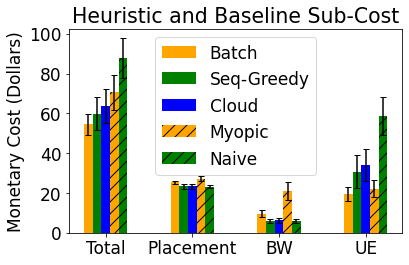

In [5]:
# Plot the plot
import matplotlib
import matplotlib.pyplot as plt

# Set Font Size Limitations
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 17}

matplotlib.rc('font', **font)

# Set Labels
labels = ['Total', 'Placement', 'BW', 'UE']

# Obtain Values to Plot
SG_means = [np.mean(SG_total_sum), np.mean(SG_placement_sum), np.mean(SG_bw_sum), np.mean(SG_UE_sum)]
Batch_means = [np.mean(Batch_total_sum), np.mean(Batch_placement_sum), np.mean(Batch_bw_sum), np.mean(Batch_UE_sum)]
Myopic_means = [np.mean(Myopic_total_sum), np.mean(Myopic_placement_sum), np.mean(Myopic_bw_sum), np.mean(Myopic_UE_sum)]
Naive_means = [np.mean(Naive_total_sum), np.mean(Naive_placement_sum), np.mean(Naive_bw_sum), np.mean(Naive_UE_sum)]
Cloud_means = [np.mean(Cloud_total_sum), np.mean(Cloud_placement_sum), np.mean(Cloud_bw_sum), np.mean(Cloud_UE_sum)]


SG_var = [np.std(SG_total_sum), np.std(SG_placement_sum), np.std(SG_bw_sum), np.std(SG_UE_sum)]
Batch_var = [np.std(Batch_total_sum), np.std(Batch_placement_sum), np.std(Batch_bw_sum), np.std(Batch_UE_sum)]
Myopic_var = [np.std(Myopic_total_sum), np.std(Myopic_placement_sum), np.std(Myopic_bw_sum), np.std(Myopic_UE_sum)]
Naive_var = [np.std(Naive_total_sum), np.std(Naive_placement_sum), np.std(Naive_bw_sum), np.std(Naive_UE_sum)]
Cloud_var = [np.std(Cloud_total_sum), np.std(Cloud_placement_sum), np.std(Cloud_bw_sum), np.std(Cloud_UE_sum)]


x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x = x - width/2, height =  Batch_means, yerr = Batch_var,
                capsize = 3, width = width/4, label='Batch', color='orange')
rects2 = ax.bar(x = x - width/4, height = SG_means, yerr = SG_var, 
                capsize = 3, width = width/4, label='Seq-Greedy', color = 'green')
rects5 = ax.bar(x = x, height = Cloud_means, yerr = Cloud_var, 
                capsize = 3, width = width/4, label='Cloud', color = 'blue')
rects3 = ax.bar(x = x + width/4, height =  Myopic_means, yerr = Myopic_var,
                capsize = 3, width = width/4, label='Myopic', color='orange',hatch='//')
rects4 = ax.bar(x = x + width/2, height = Naive_means, yerr = Naive_var, 
                capsize = 3, width = width/4, label='Naive', color = 'green',hatch='//')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Monetary Cost (Dollars)')
ax.set_title('Heuristic and Baseline Sub-Cost')
ax.set_xticks(x)
# ax.set_xlabel('Cost Type')
ax.set_xticklabels(labels)
ax.legend()

# Set Y axis to zero
plt.ylim(0,)

fig.tight_layout()

plt.show()

In [6]:
import pickle

cost_stores_dic = {}
cost_stores_dic["SG"] = SG_cost_stores
cost_stores_dic["Batch"] = Batch_cost_stores
cost_stores_dic["Naive"] = Naive_cost_stores
cost_stores_dic["Myopic"] = Myopic_cost_stores

pickle.dump(cost_stores_dic, open(os.path.curdir + "/sim_store/sim12/cost_store_v3.p", "wb" ) )



### Ample vs Limited Resources

In [7]:
# Log the costs of interest
num_trials = len(Batch_cost_stores_ample)

SG_total_sum_ample = np.zeros(num_trials)

Batch_total_sum_ample = np.zeros(num_trials)

Myopic_total_sum_ample = np.zeros(num_trials)

Naive_total_sum_ample = np.zeros(num_trials)

Cloud_total_sum_ample = np.zeros(num_trials)

for i in range(num_trials):

    SG_total_sum_ample[i] += SG_cost_stores_ample[i].all_cost_cumulative["total_cost"][-1]

    Batch_total_sum_ample[i] += Batch_cost_stores_ample[i].all_cost_cumulative["total_cost"][-1]
    
    Myopic_total_sum_ample[i] += Myopic_cost_stores_ample[i].all_cost_cumulative["total_cost"][-1]
    
    Naive_total_sum_ample[i] += Naive_cost_stores_ample[i].all_cost_cumulative["total_cost"][-1]
    
    Cloud_total_sum_ample[i] += Cloud_cost_stores_ample[i].all_cost_cumulative["total_cost"][-1]

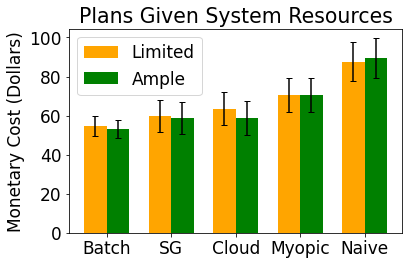

In [8]:
# Plot the plot
import matplotlib
import matplotlib.pyplot as plt

# Set Font Size Limitations
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 17}

matplotlib.rc('font', **font)

# Set Labels
labels = ['Batch', 'SG', 'Cloud', 'Myopic', 'Naive']

# Obtain Values to Plot
lim_means = [np.mean(Batch_total_sum), 
             np.mean(SG_total_sum),
             np.mean(Cloud_total_sum),
             np.mean(Myopic_total_sum),
            np.mean(Naive_total_sum)]

ample_means= [np.mean(Batch_total_sum_ample), 
             np.mean(SG_total_sum_ample),
             np.mean(Cloud_total_sum_ample),
             np.mean(Myopic_total_sum_ample),
             np.mean(Naive_total_sum_ample)]

lim_std = [np.std(Batch_total_sum),
           np.std(SG_total_sum), 
           np.std(Cloud_total_sum),
           np.std(Myopic_total_sum),
           np.std(Naive_total_sum)]

ample_std = [np.std(Batch_total_sum_ample), 
             np.std(SG_total_sum_ample),
             np.std(Cloud_total_sum_ample),
             np.std(Myopic_total_sum_ample),
             np.std(Naive_total_sum_ample)]



x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x = x-width/2, height =  lim_means, yerr = lim_std,
                capsize = 3, width = width, label='Limited', color='orange')
rects2 = ax.bar(x = x+width/2, height = ample_means, yerr = ample_std, 
                capsize = 3, width = width, label='Ample', color = 'green')


# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_xlabel('Plan Type')
ax.set_ylabel('Monetary Cost (Dollars)')
ax.set_title('Plans Given System Resources')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Set Y axis to zero
plt.ylim(0,)

fig.tight_layout()

plt.show()

### Pickle ample results

In [9]:
import pickle

cost_stores_dic = {}
cost_stores_dic["SG"] = SG_cost_stores_ample
cost_stores_dic["Batch"] = Batch_cost_stores_ample
cost_stores_dic["Naive"] = Naive_cost_stores_ample
cost_stores_dic["Myopic"] = Myopic_cost_stores_ample

pickle.dump(cost_stores_dic, open(os.path.curdir + "/sim_store/sim12/cost_store_ample_v3.p", "wb" ) )
